In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob         
import numpy as np
import seaborn as sb
from os import listdir
from os.path import isfile, join
import matplotlib.ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
secao_dic = {
    'A': 'Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura',
    'B': 'Indústrias Extrativas',
    'C': 'Indústrias de Transformação',
    'D': 'Eletricidade e Gás',
    'E': 'Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação',
    'F': 'Construção',
    'G': 'Comércio, Reparação de Veículos Automotores e Motocicletas',
    'H': 'Transporte, Armazenagem e Correio',
    'I': 'Alojamento e Alimentação',
    'J': 'Informação e Comunicação',
    'K': 'Atividades Financeiras, de Seguros e Serviços Relacionados',
    'L': 'Atividades Imobiliárias',
    'M': 'Atividades Profissionais, Científicas e Técnicas',
    'N': 'Atividades Administrativas e Serviços Complementares',
    'O': 'Administração Pública, Defesa e Seguridade Social',
    'P': 'Educação',
    'Q': 'Saúde Humana e Serviços Sociais',
    'R': 'Artes, Cultura, Esporte e Recreação',
    'S': 'Outras Atividades de Serviços',
    'T': 'Serviços Domésticos',
    'U': 'Organismos Internacionais e Outras Instituições Extraterritoriais',
    'Z': 'Não identificado'}

In [3]:
# carrega arquivo em dafaframe / exclui NaNs
def loadDataFrame(file):
    df = pd.read_csv(file, sep=';')
    df.dropna(inplace = True)
    return df

# prepara dataframe
def prepareDataframe (df, parameter, parameter_dic):
    # exclui colunas irrelevantes
    df = df[['saldomovimentação', parameter]]
    # substitui magic numbers
    df['saldomovimentação'] = df['saldomovimentação'].map({1: 'Admissões', -1: 'Demissões'})
    df[parameter] = df[parameter].map(parameter_dic)
    return df

# gera gráficos
def generateChart(df, parameter, competencia, requisito):
    ax = pd.pivot_table(
        df,
        columns=df['saldomovimentação'],
        index=df[parameter],
        values=parameter,
        aggfunc='count',
        fill_value=0
    ).sort_values(by='Admissões',ascending=True
    ).plot.barh(
        figsize = (15,8),
    #     stacked=True,
        logx=True
    )
    # configuração do gráfico
    ax.legend(bbox_to_anchor=(1, 0), loc='lower right')
    ax.xaxis.set_major_formatter(
        StrMethodFormatter('{x:.0f}'))
    # insere thousand separator
    ax.get_xaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(
        lambda x, p: format(int(x), ',')))
    ax.set_title("PESSOAS ADMITIDAS E DEMITIDAS POR " + requisito + " EM "+ competencia)

In [4]:
# verificar arquivos com o padrão CAGEDMOV no diretorio
mypath = "/Users/mariaclara1985/Documents/3_fatec_bd/6SEM/bd-n-estruturado/novocaged/teste"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and 'CAGEDMOV' in f]
onlyfiles.sort()

# 1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:


## - Setor

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

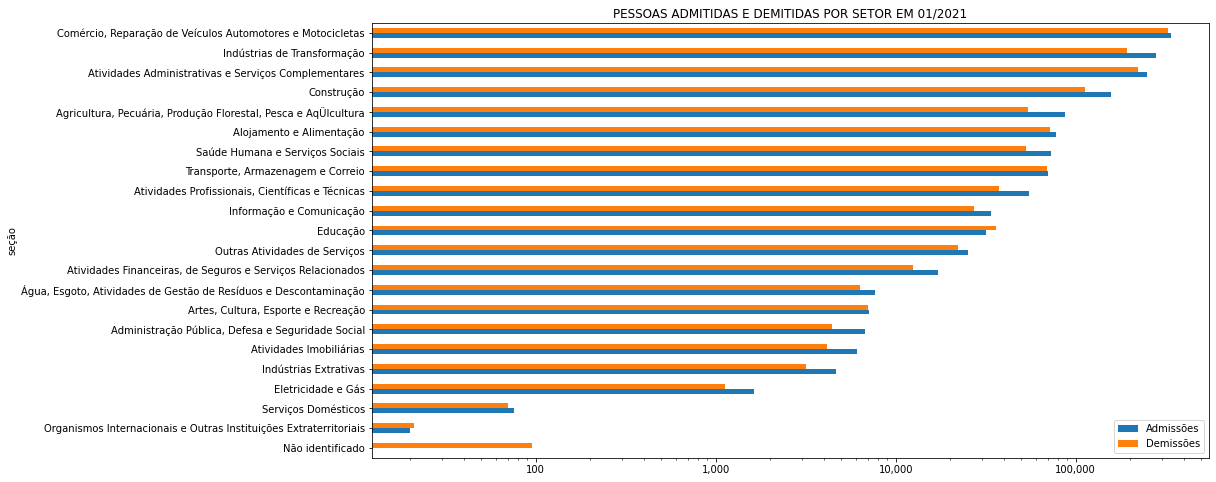

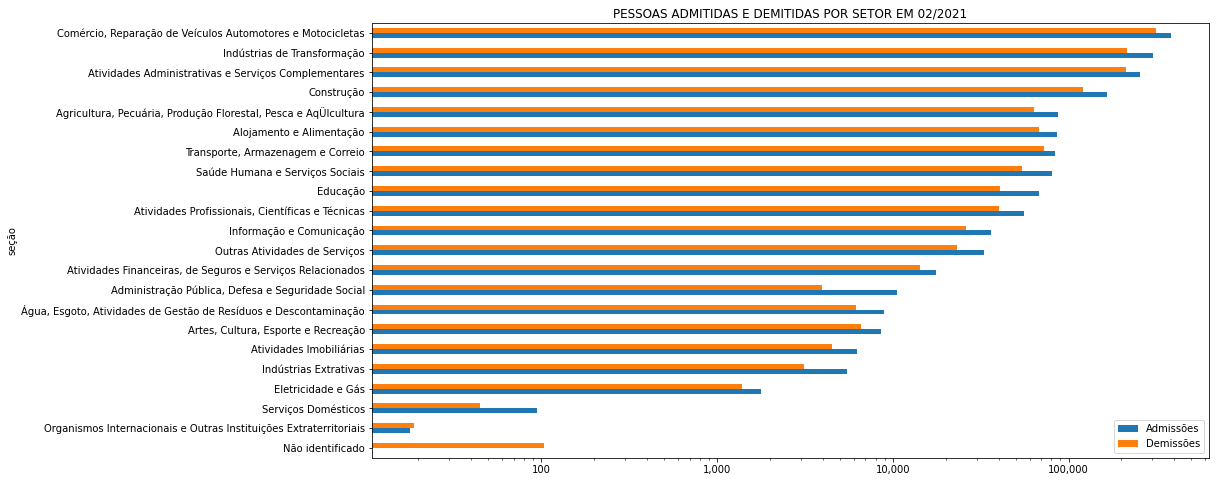

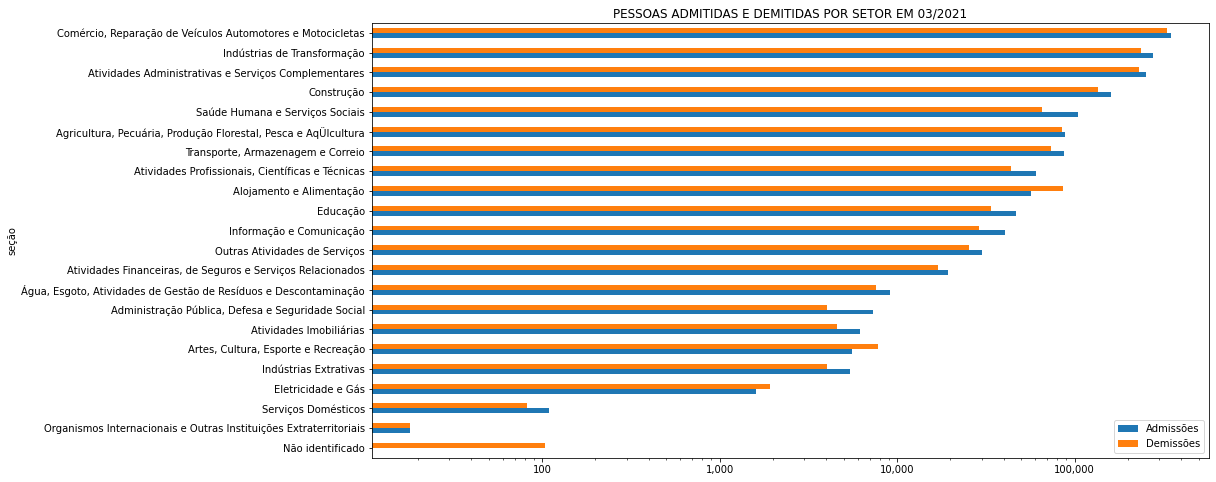

In [5]:
# lista de todos os arquivos
# caged_files = sorted(glob('teste/CAGEDMOV202101.txt'))
# concatena os arquivos
# file = 'teste/CAGEDMOV202101.txt'
for file in onlyfiles:
    pandemia_df = loadDataFrame(file)
    questao01e_df = prepareDataframe(pandemia_df, 'seção', secao_dic)
    competencia = str(file)[12:-4] + "/"+ str(file)[8:-6]
    generateChart(questao01e_df, 'seção', competencia, "SETOR")